                  功能选择                   
	1、输入数据		2、存入文件
	3、使用链路状态协议	4、读取文件内容
	5、数据传输路径		6、更新路由（增加）
	7、更新路由（删除）	8、打印路由表
	9.打印拓扑结构图	10、退出
请选择要进行的操作1
请输入节点数:5
边数：7
输入节点一：0
输入节点二：1
输入权重:3


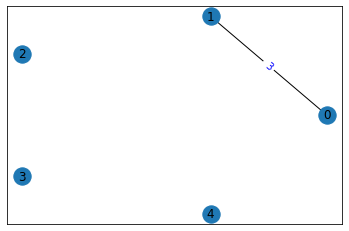

输入节点一：0
输入节点二：3
输入权重:10


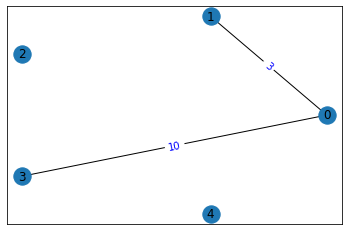

输入节点一：0
输入节点二：4
输入权重:16


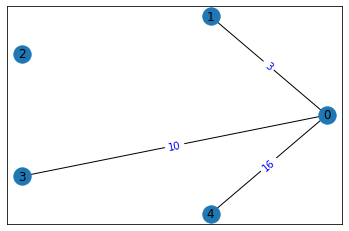

输入节点一：1
输入节点二：2
输入权重:2


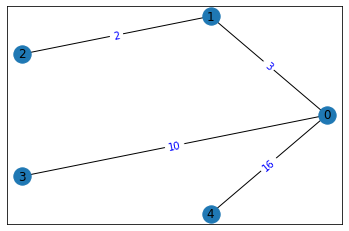

输入节点一：1
输入节点二：3
输入权重:7


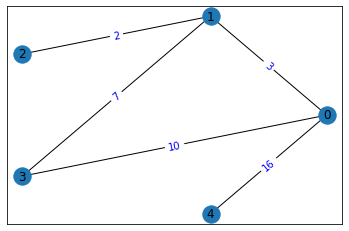

输入节点一：2
输入节点二：4
输入权重:2


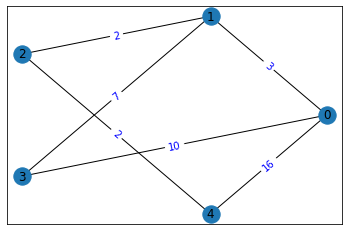

输入节点一：4
输入节点二：3
输入权重:2


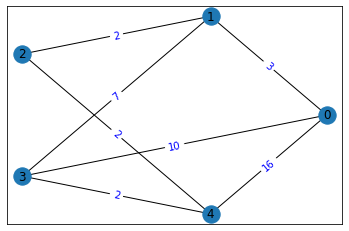

路由 0 的路由表
-----------------------------------------------
	目的路由 	长度
-----------------------------------------------
	 1 		 3
------------------------------------------------
	 3 		 10
------------------------------------------------
	 4 		 16
------------------------------------------------

路由 1 的路由表
-----------------------------------------------
	目的路由 	长度
-----------------------------------------------
	 0 		 3
------------------------------------------------
	 2 		 2
------------------------------------------------
	 3 		 7
------------------------------------------------

路由 2 的路由表
-----------------------------------------------
	目的路由 	长度
-----------------------------------------------
	 1 		 2
------------------------------------------------
	 4 		 2
------------------------------------------------

路由 3 的路由表
-----------------------------------------------
	目的路由 	长度
-----------------------------------------------
	 0 		 10
------------------------------------------------
	 1 		 7

In [75]:
###### from matplotlib import pyplot as plt
from matplotlib import pyplot as plt 
import networkx as nx

import pickle

import pylab

import numpy as numpy

#sh
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# To add an edge

def addEdge(adj, u, v, wt,jump):
    
    adj[u].append([v, wt,jump,u])
    adj[v].append([u, wt,jump,v])
    return adj

# Print adjacency list representation of graph
def printGraph(adj, V):
    v, w = 0, 0
    for u in range(len(adj)):
        print("路由", adj[u][0][3], "的路由表")
        print("-----------------------------------------------")
        print("\t目的路由", "\t长度")
        print("-----------------------------------------------")
        for it in adj[u]:
            v = it[0]
            w = it[1]
            
            print("\t",v, "\t\t", w)
            print("------------------------------------------------")
        
        print()

def print_after(adj, V):
    v, w = 0, 0
    for u in range(len(adj)):
        try:
            print("路由", adj[u][0][3], "的路由表")
            print("-----------------------------------------------")
            print("\t目的路由", "\t长度","\t下一跳")
            print("-----------------------------------------------")
            for it in adj[u]:
                v = it[0]
                w = it[1]
                e = it[2]
                print("\t",v, "\t\t", w,"\t",e)
                print("------------------------------------------------")
            
            print()
        except:
            continue

def inputdata(adj,V):
    global G
    G=nx.Graph()
    input_n=[]
    for i in range(V):
        input_n.append(i)
    G.add_nodes_from(input_n)
    
    num=input("边数：")
    pos = nx.circular_layout(G)
    d={}
    tmp={}
    for i in range (int(num)):
        O1=int(input("输入节点一："))
        O2=int(input("输入节点二："))
        E=int(input("输入权重:"))
        jump=-1
        adj=addEdge(adj,O1,O2,E,jump)
        
        G.add_weighted_edges_from([(O1,O2,E)])
        nx.draw_networkx(G,pos)
        d={(O1,O2):E}
        tmp.update(d)
        nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={(O1, O2): E},
        font_color='red'
    )
        nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=tmp,
        font_color='blue'
    )
        plt.show()
2

def printfile():
    File=open('data of Router1.pkl','rb')
    global adj
    adj=pickle.load(File)
    global V
    V=len(adj)
    print_after(adj,len(adj))
    global G
    G=nx.Graph()
    input_n=[]
    for i in range(V):
        input_n.append(i)
    G.add_nodes_from(input_n)
    pos = nx.circular_layout(G, center=[-1,1])
    d={}
    tmp={}
    for i in range(len(adj)):
        for j in range(len(adj[i])):
            G.add_weighted_edges_from([(i,adj[i][j][0],adj[i][j][1])])
            nx.draw_networkx(G,pos)
            d={(i,adj[i][j][0]):adj[i][j][1]}
            tmp.update(d)
            nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels={(i, adj[i][j][0]): adj[i][j][1]},
            font_color='red'
        )
            nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels=tmp,
            font_color='blue'
        )
    plt.show()
def Dijkstra(G,adj):
    Q=len(adj)+10
    input_n=[]
    for i in range(len(adj)):
        input_n.append(adj[i][0][3])
    adj = [[] for i in range(Q)]
    for i in range(Q):
        for j in range(Q):
            if j in input_n:
                try:
                    if nx.has_path(G,i,j):
                        path=nx.dijkstra_path(G, source=i, target=j)
                        distance=nx.dijkstra_path_length(G, source=i, target=j)
                        adj[i].append([j, distance, path[1],i])
                except:
                    continue
    print_after(adj,Q)                
def router_path(G):
    R = nx.DiGraph()
    d={}
    tmp={}
    u,v=map(int, input("请输入两个路由器的序号:").split())
    print('dijkstra方法寻找最短路径：')
    path=nx.dijkstra_path(G, source=u, target=v)
    pos = nx.circular_layout(G, center=[-1,1])
    #画图
    for i in range(len(path)-1):
        for j in range(len(adj[i])):#找到adj中对应边的权值
            if adj[i][j][0]==path[i+1]:
                index=j
                break
        try:
            R.add_weighted_edges_from([(path[i],path[i+1],adj[path[i]][index][1])])
            nx.draw(R,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )
            d={(path[i],path[i+1]):adj[path[i]][index][1]}
            tmp.update(d)
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels={(path[i],path[i+1]):adj[path[i]][index][1]},
                font_color='black'
            )
        except:
            continue

    print('节点',u,'到',v,'的最短路径：', path)
    print('dijkstra方法寻找最短距离：')
    distance=nx.dijkstra_path_length(G, source=u, target=v)
    print('节点',u,'到',v,'的距离为：', distance) 
    
    pylab.title("最短路径图",fontsize=15)
    pylab.show()                    

def print_p(adj,V):
    global G
    G=nx.Graph()
    input_n=[]
    for i in range(len(adj)):
        input_n.append(adj[i][0][3])
    G.add_nodes_from(input_n)    
    pos = nx.circular_layout(G, center=[-1,1])
    d={}
    tmp={}
    for i in range(len(adj)):
        for j in range(len(adj[i])):
            try:
                G.add_weighted_edges_from([(adj[i][j][3],adj[i][j][0],adj[i][j][1])])
                nx.draw_networkx(G,pos)
                d={(adj[i][j][3],adj[i][j][0]):adj[i][j][1]}
                tmp.update(d)
                nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels={(adj[i][j][3], adj[i][j][0]): adj[i][j][1]},
                font_color='red'
            )
                nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels=tmp,
                font_color='blue'
            )
            except:
                continue
    plt.show()
def add_e(adj,V,G):
    
    pos = nx.spring_layout(G)
    n=int(input("请输入要添加的路由器数目"))
    if n>0:
        r=int(input("请输入路由器名字"))
        G.add_node(r)
        adj.append([])
        V=V+1
    num=input("请输入要添加的边数")
    O1=int(input("输入节点一："))
    O2=int(input("输入节点二："))
    E=int(input("输入权重:"))
    jump=-1
    adj=addEdge(adj,O1,O2,E,jump)
    print("添加成功！")

def inputfile(adj):
    F=open("data of Router1.pkl",'wb')
    pickle.dump(adj,F,0)
  
def pop(adj,V):
    b=int(input("请输入1、要删除边 2、删除路由器"))
    if b==1:
        u=int(input("请输入要删除对应边的路由器1"))
        v=int(input("请输入要删除对应边的路由器1"))
        e=int(input("请输入对应边的权值"))
        jump=-1
        adj[u].remove([v,e,jump,u])
        adj[v].remove([u,e,jump,v])
    if b==2:
        global r
        out=[]
        r=int(input("请输入要删除的路由器"))
        for i in range(len(adj)):
            for j in range(len(adj[i])):#找到adj中对应边的权值
                if adj[i][j][0]==r:
                    out.append([r,adj[i][j][1],adj[i][j][2],adj[i][j][3]])
                    
            if len(out)!=0:
                adj[i].remove(out[0])
                out=[]
        for i in range(len(adj)):
            try:
                if adj[i][0][3]==r:
                    del adj[i]
            except:
                continue
   
    print("删除成功！")
    
        

  # Driver code
if __name__ == '__main__':
        
    global V
    global G
    flag=0
    while flag==0:
        print("=============================================")
        print("                  功能选择                   ")
        print("\t1、输入数据\t\t2、存入文件")
        print("\t3、使用链路状态协议\t4、读取文件内容")
        print("\t5、数据传输路径\t\t6、更新路由（增加）")
        print("\t7、更新路由（删除）\t8、打印路由表")
        print("\t9.打印拓扑结构图\t10、退出")
        print("=============================================")
        botton=int(input("请选择要进行的操作"))
        if botton==1:#输入数据
            V = int(input("请输入节点数:"))
            adj = [[] for i in range(V)]
            inputdata(adj,V)
            printGraph(adj,V)
        if botton==2:#写入文件
            if len(adj)==0:
                print("当前内容为空")
            print("正在写入数据......")
            print("数据写入成功!")
            inputfile(adj)
        if botton==3:#打印路由表
            Dijkstra(G,adj)           
        if botton==4:
            printfile()
        if botton==5:
            router_path(G)
        if botton==6:
            add_e(adj,V,G)
        if botton==7:
            pop(adj,V)
        if botton==8:
            print_after(adj,V)
        if botton==9:
            print_p(adj,V)
        if botton==10:
            flag=1
            print("操作结束！")